In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [33]:
sizes = [10, 10, 5]
probs = [[0.8, 0.2, 0.1], [0.2, 0.8, 0.3], [0.1, 0.3, 0.8]]
g = nx.stochastic_block_model(sizes, probs, seed=0)
c = [0] * 10 + [1] * 10 + [2]*5

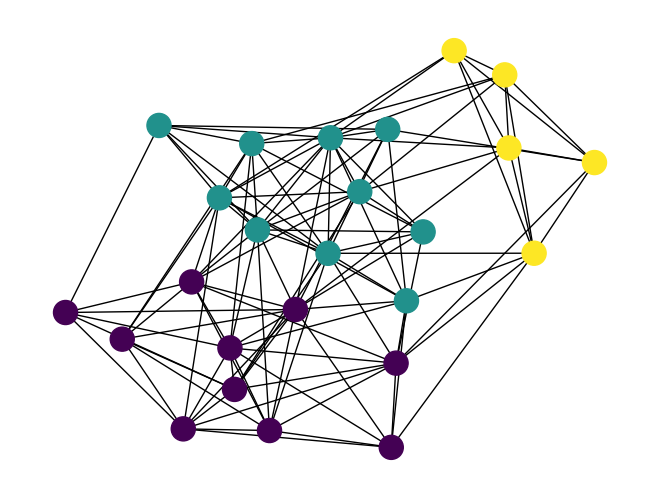

In [34]:
nx.draw(g,node_color=c)

In [35]:
nx.average_clustering(g)

0.4787778887778888

In [5]:
ac = np.zeros(25)
for i in range(1,25):
    sub = np.random.choice(25,i,replace=False)
    g1 = g.subgraph(sub)
    ac[i] = nx.average_clustering(g1)

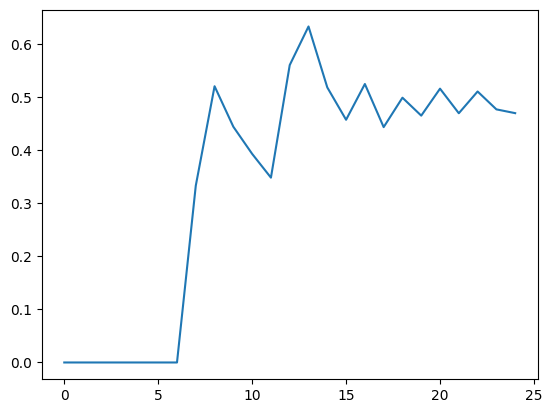

In [6]:
plt.plot(np.arange(25),ac)

In [7]:
ac

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.33333333, 0.52083333, 0.44444444,
       0.39333333, 0.34848485, 0.56071429, 0.63351648, 0.5185941 ,
       0.45761905, 0.5250496 , 0.44374416, 0.49925044, 0.46541353,
       0.5162518 , 0.46991686, 0.51092418, 0.47722833, 0.47009403])

In [36]:
N = 100
g = nx.barabasi_albert_graph(N,3)

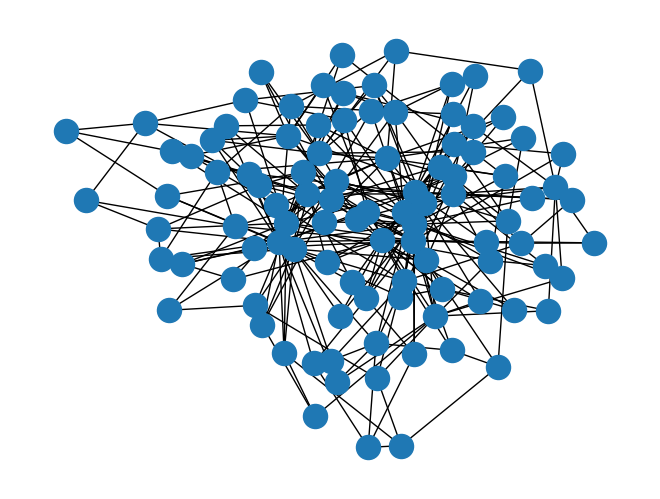

In [37]:
nx.draw(g)

In [40]:
nx.average_clustering(g)

0.17349564734782125

In [41]:
ac = np.zeros(N)
for i in range(1,N):
    sub = np.random.choice(N,i,replace=False)
    g1 = g.subgraph(sub)
    ac[i] = nx.average_clustering(g1)

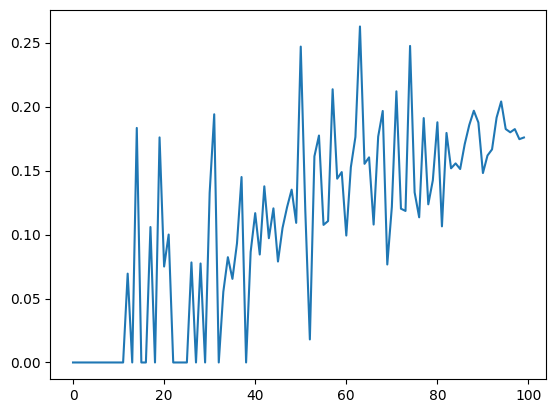

In [42]:
plt.plot(np.arange(N),ac)

In [43]:
ac

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.06944444, 0.        , 0.18333333,
       0.        , 0.        , 0.10588235, 0.        , 0.17593985,
       0.075     , 0.1       , 0.        , 0.        , 0.        ,
       0.        , 0.07820513, 0.        , 0.07738095, 0.        ,
       0.13259259, 0.19400922, 0.        , 0.05521886, 0.08228291,
       0.06537415, 0.09310967, 0.14496509, 0.        , 0.08638584,
       0.11672466, 0.08439799, 0.13769841, 0.09713245, 0.12046602,
       0.07891935, 0.1051527 , 0.12143164, 0.13509951, 0.10913508,
       0.24691703, 0.11873638, 0.01800977, 0.16116462, 0.17739174,
       0.10754821, 0.11055968, 0.21356421, 0.1436701 , 0.14882575,
       0.09922772, 0.15262825, 0.17626379, 0.26264294, 0.15528499,
       0.1603379 , 0.10780978, 0.17655205, 0.19659163, 0.07659373,
       0.12161462, 0.21194861, 0.12022062, 0.11844815, 0.24743

In [44]:
N = 100
sample = 100
ac = np.zeros(N)
for _ in range(sample):
    g = nx.barabasi_albert_graph(N,3)
    for i in range(1,N):
        sub = np.random.choice(N,i,replace=False)
        g1 = g.subgraph(sub)
        ac[i] += nx.average_clustering(g1)
ac /= sample

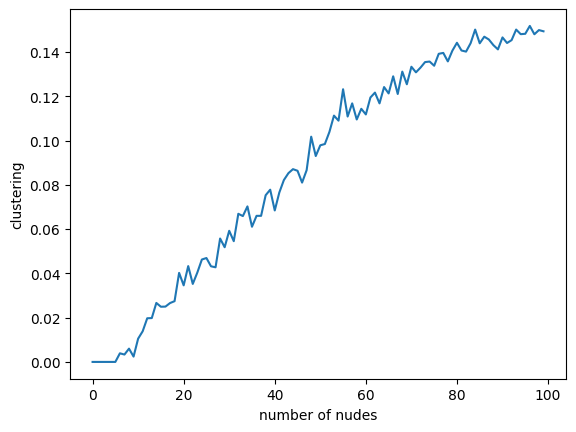

In [45]:
plt.plot(np.arange(N),ac)
plt.xlabel("number of nudes")
plt.ylabel("clustering")
plt.savefig("Sample_BA_clustering.pdf")
plt.show()


In [46]:
N = 100
sample = 100
ac = np.zeros(N)
for _ in range(sample):
    sizes = [40, 40, 20]
    probs = [[0.8, 0.2, 0.1], [0.2, 0.8, 0.3], [0.1, 0.3, 0.8]]
    g = nx.stochastic_block_model(sizes, probs, seed=0)
    for i in range(1,N):
        sub = np.random.choice(N,i,replace=False)
        g1 = g.subgraph(sub)
        ac[i] += nx.average_clustering(g1)
ac /= sample

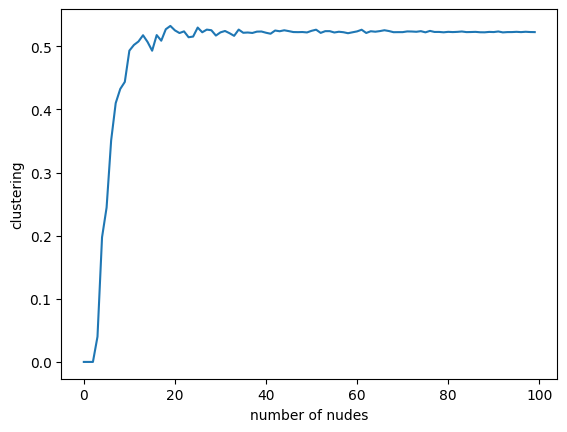

In [48]:
plt.plot(np.arange(N),ac)
plt.xlabel("number of nudes")
plt.ylabel("clustering")
plt.savefig("Sample_SBM_clustering.pdf")
plt.show()


## Original SBM

In [49]:
N = 60
M = 20

In [50]:
sizes = [30, 20, 10]
probs = [[0.8, 0.1, 0.05], [0.1, 0.8, 0.1], [0.05, 0.1, 0.8]]
g = nx.stochastic_block_model(sizes, probs, seed=0)
c = []
for i,s in enumerate(sizes):
    c += s*[i]
c = np.array(c)

In [51]:
pos=nx.spring_layout(g)

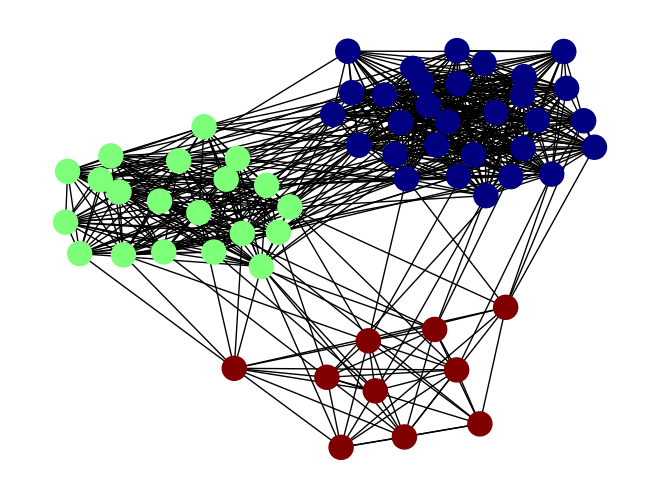

In [52]:
nx.draw(g,node_color=c,cmap='jet',pos=pos)

## Node select 30%

In [62]:
node_s = np.random.choice(N,M,replace=False)
node_s.sort()

In [63]:
pos2 = dict()
for k,v in pos.items():
    if k in node_s:
        pos2[k] = v

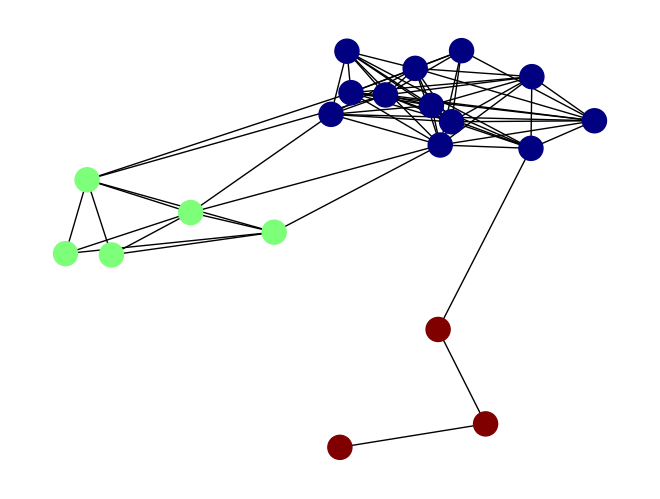

In [64]:
nx.draw(g.subgraph(node_s),node_color=c[node_s],cmap='jet',pos=pos2)

## Random walk 30%

In [65]:
i = np.random.randint(N)
node_s = set([i])
while len(node_s) < M:
    neighs = list(g.neighbors(i))
    i = np.random.choice(neighs,1)[0]
    node_s.add(i)
node_s = np.array(list(node_s))
node_s.sort()

In [66]:
pos2 = dict()
for k,v in pos.items():
    if k in node_s:
        pos2[k] = v

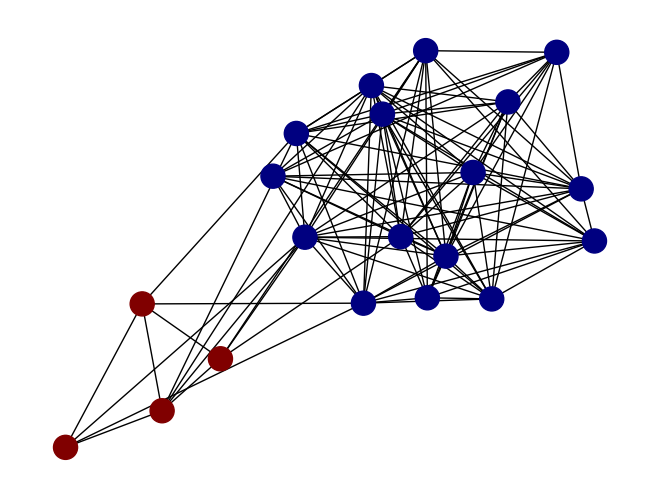

In [67]:
nx.draw(g.subgraph(node_s),node_color=c[node_s],cmap='jet',pos=pos2)

## Link select: link 30%

In [68]:
le = list(g.edges())
node_s = set()
edges = []
nne = len(le) / 3
while len(edges) < nne:
    i = np.random.choice(len(le),1)[0]
    j = le.pop(i)
    edges.append(j)
    node_s.add(j[0])
    node_s.add(j[1])
node_s = np.array(list(node_s))
node_s.sort()


In [69]:
pos2 = dict()
for k,v in pos.items():
    if k in node_s:
        pos2[k] = v

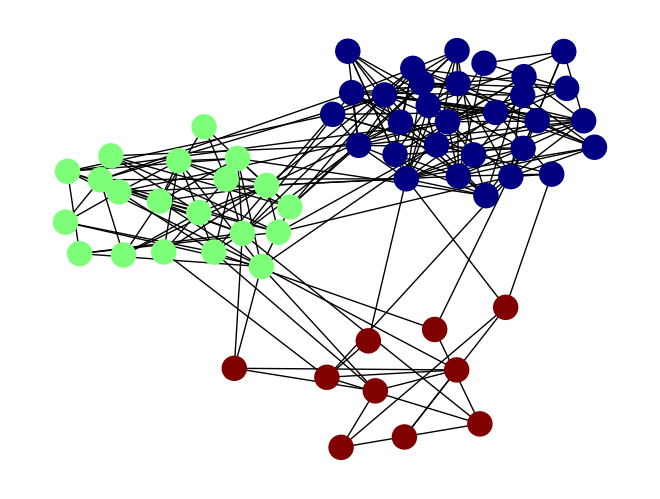

In [70]:
nx.draw(g.edge_subgraph(edges),node_color=c[node_s],cmap='jet',pos=pos2)

## Link select: node 30%

In [71]:
le = list(g.edges())
node_s = set()
edges = []
while len(node_s) < M:
    i = np.random.choice(len(le),1)[0]
    j = le.pop(i)
    edges.append(j)
    node_s.add(j[0])
    node_s.add(j[1])
node_s = np.array(list(node_s))
node_s.sort()


In [72]:
pos2 = dict()
for k,v in pos.items():
    if k in node_s:
        pos2[k] = v

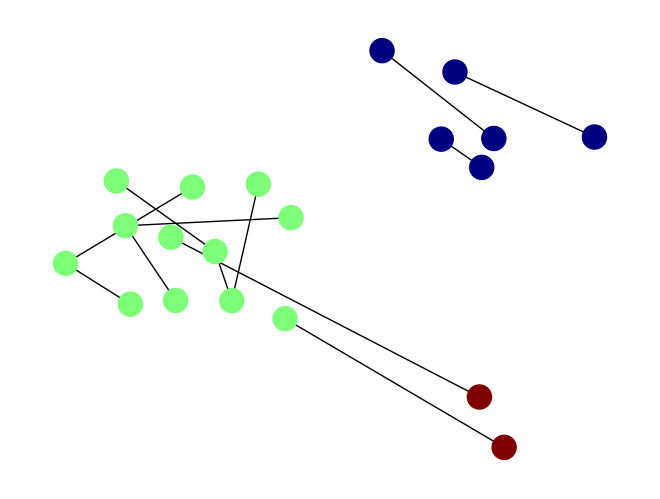

In [73]:
nx.draw(g.edge_subgraph(edges),node_color=c[node_s],cmap='jet',pos=pos2)

## link select: node 30% induced subgraph

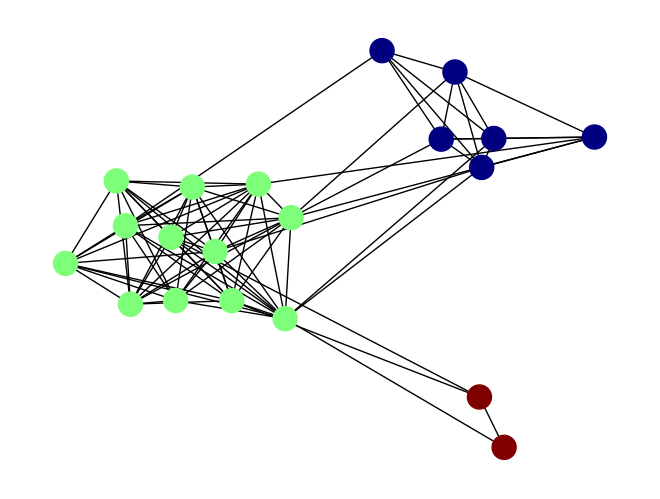

In [74]:
nx.draw(g.subgraph(node_s),node_color=c[node_s],cmap='jet',pos=pos2)

## Task
Reproduce the figures on slides 38 and 40 of the lecture slides!

 * Create an Erdős-Rényi network
 * Assign an affinity to each node (use at lest three different distributions of your choice)
 * Keep the links with probability proportional to the minimum of the affinities of the two nodes
 * Plot the degree distribution and the assortativity curve

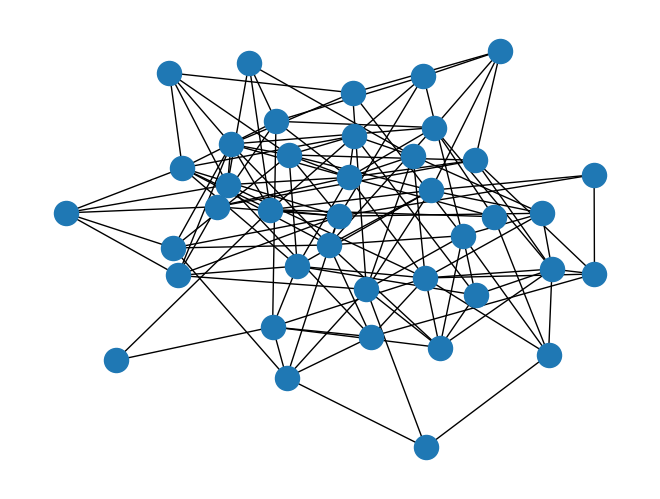

In [78]:
er = nx.erdos_renyi_graph(40, .2)
nx.draw(er)

In [86]:
def set_affinity_uniform(g):
    for n in g.nodes():
        g.nodes[n]['affinity'] = np.random.uniform(0, 1)
    return g
def set_affinity_normal(g):
    for n in g.nodes():
        g.nodes[n]['affinity'] = np.random.normal(0, 1)
    return g
def set_affinity_power_law(g):
    for n in g.nodes():
        g.nodes[n]['affinity'] = np.random.power(1)
    return g


er_uniform = set_affinity_uniform(er)
er_normal = set_affinity_normal(er)
er_power_law = set_affinity_power_law(er)

print(er_uniform.nodes[0])


{'affinity': 0.23487288113748273}


In [83]:
le = list(er_uniform.edges())
node_s = set()
edges = []
nne = len(le) / 3
while len(edges) < nne:
    i = np.random.choice(len(le),1)[0]
    j = le.pop(i)
    edges.append(j)
    affinity = min(er_uniform.nodes[j[0]]['affinity'], er_uniform.nodes[j[1]]['affinity'])
    if np.random.uniform(0, 1) < affinity:
        node_s.add(j[0])
        node_s.add(j[1])
node_s = np.array(list(node_s))
node_s.sort()


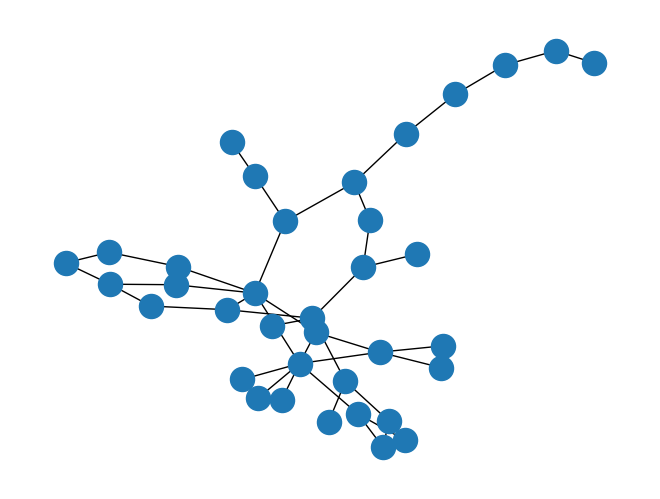

In [85]:
nx.draw(er_uniform.edge_subgraph(edges))